In [45]:
import pandas as pd
import numpy as np
import seaborn  as sns
from sklearn import preprocessing

In [46]:
df1 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\My Project Datasets\train.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
print(list(df1.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [48]:
df1['HasCabin'] = df1['Cabin'].notna().astype(int)
df1.drop(columns = ['Cabin'],inplace = True)
df1 = df1.dropna(subset = ['Embarked'])
df1['Age'] = df1['Age'].round()
df1['Age'] = df1.groupby(['Pclass','Sex'])['Age'] \
    .transform(lambda x: x.fillna(x.median()))
num_blank = df1[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'HasCabin', 'Embarked']].isna().sum()
print(num_blank)
df1.head()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
HasCabin       0
Embarked       0
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15944\2447946666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['Age'].round()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15944\2447946666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1.groupby(['Pclass','Sex'])['Age'] \


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


<Axes: >

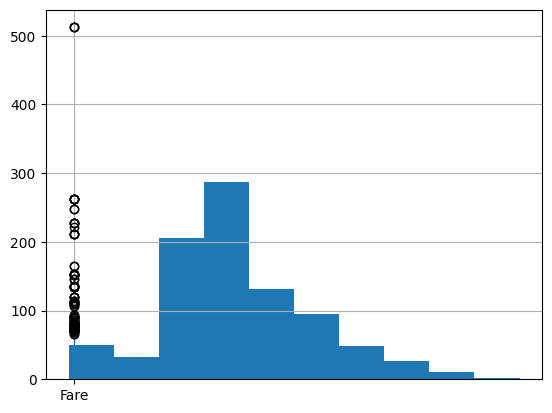

In [49]:
df1['Age'].hist()
df1.boxplot(column = 'Fare')

In [50]:
df1[['Age','Fare']].describe()


,Age,Fare
count,889.000000,889.000000
mean,29.060742,32.096681
std,13.268206,49.697504
min,0.000000,0.000000
25%,21.500000,7.895800
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


In [51]:
df1['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [52]:
df1['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

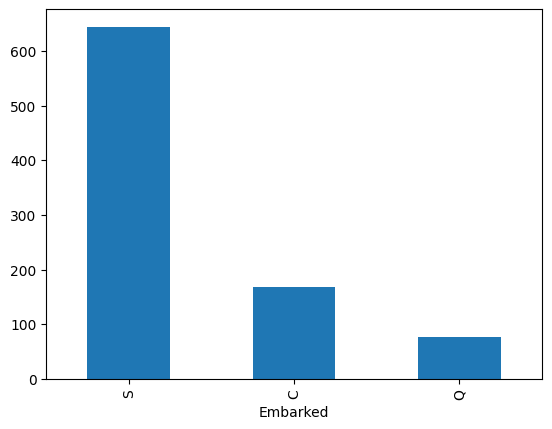

In [53]:
df1['Embarked'].value_counts().plot(kind='bar')


This bar chart shows the total number of passengers who boarded the Titanic at each of the three ports:

S (Southampton, UK): The vast majority of passengers (over 600) embarked here.

C (Cherbourg, France): Approximately 170 passengers boarded here.

Q (Queenstown/Cobh, Ireland): The fewest passengers (under 100) joined at this final stop.

Southampton was the primary starting point for the voyage, carrying more than triple the number of passengers compared to the other two ports combined.

In [54]:
pd.crosstab(df1['Sex'], df1['Survived'], normalize='index')*100  


Survived,0,1
Sex,,
female,25.961538,74.038462
male,81.109185,18.890815


This table shows the survival percentages based on gender:

Females: Had a very high survival rate of approximately 74%.

Males: Had a very low survival rate of approximately 19%.

Women were nearly 4 times more likely to survive than men, reflecting the "women and children first" evacuation policy.

In [55]:
survival_by_port = pd.crosstab(df1['Embarked'], df1['Survived'], normalize='index') * 100
print(survival_by_port)


Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


This table shows the survival percentages based on where passengers boarded the ship:

C (Cherbourg): Had the highest survival rate at approximately 55%.

Q (Queenstown): Had a survival rate of approximately 39%.

S (Southampton): Had the lowest survival rate at approximately 34%.

Passengers who boarded at Cherbourg were significantly more likely to survive than those who boarded at the other two ports.

<Axes: xlabel='Sex', ylabel='count'>

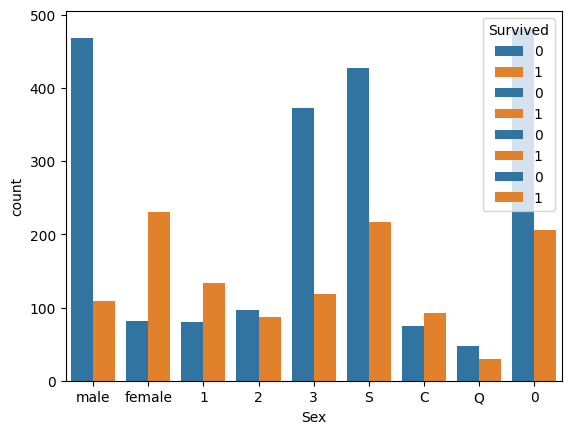

In [56]:
import seaborn as sns
sns.countplot(x='Sex', hue='Survived', data=df1)
sns.countplot(x='Pclass', hue='Survived', data=df1)
sns.countplot(x='Embarked', hue='Survived', data=df1)
sns.countplot(x='HasCabin', hue='Survived', data=df1)


This bar chart shows the total count of survivors (orange) versus non-survivors (blue) categorized by four different variables: Sex, Pclass, Embarked, and IsAlone.

Sex: Males had a much higher death toll compared to females, who were more likely to survive than not.

Pclass: Survival was highest for 1st class (1) and lowest for 3rd class (3), where the number of deaths significantly outweighed survivors.

Embarked: Most people boarded at Southampton (S) and consequently had the highest count of deaths. Cherbourg (C) shows a more even split between survival and death.

IsAlone (0 vs 1): Passengers traveling alone (1) had a higher death count compared to those traveling with family (0).

Being female and traveling in 1st class or with family were the strongest indicators of survival according to this aggregate view.

<Axes: xlabel='Survived', ylabel='Age'>

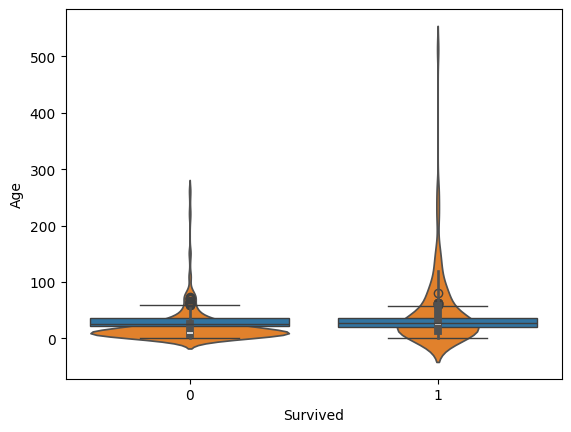

In [57]:
import seaborn  as sns
sns.boxplot(x='Survived', y='Age', data=df1)
sns.violinplot(x='Survived', y='Fare', data=df1)


This violin plot compares the Age of passengers who survived (1) versus those who did not (0):

Children (Age 0–10): The "bulge" at the bottom of the right plot (Survived) is wider than the left, showing that children had a higher survival rate.

Median Age: The blue box plots show the median age was very similar for both groups (roughly 28–30 years old).

Distribution: Most people who did not survive were concentrated in the 20–40 age range.

While the average age was similar for both groups, being a young child significantly increased the likelihood of survival.

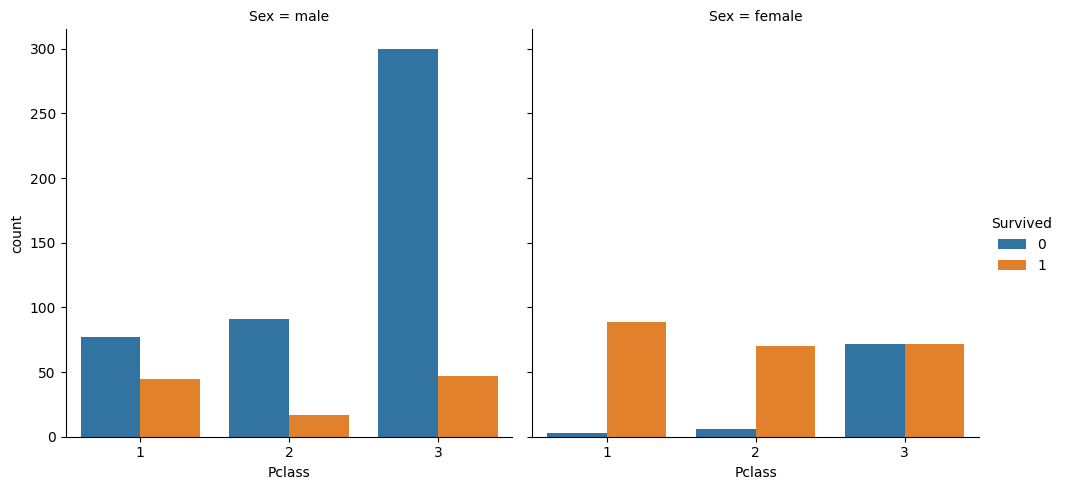

In [58]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df1)


This visualization compares survival counts across Gender, Passenger Class (Pclass), and Survival status:

For Males:
High Mortality: Across all classes, significantly more men died (blue) than survived (orange).

3rd Class Impact: The largest group of passengers was 3rd-class males, who also suffered the highest number of casualties.

For Females:
High Survival: In 1st and 2nd class, the vast majority of women survived.

3rd Class Split: Women in 3rd class had a much lower survival rate than those in higher classes, with survival being roughly a 50/50 split.

Survival was heavily influenced by both "women and children first" and socio-economic status (class), with wealthy women having the highest survival probability and 3rd-class men the lowest.

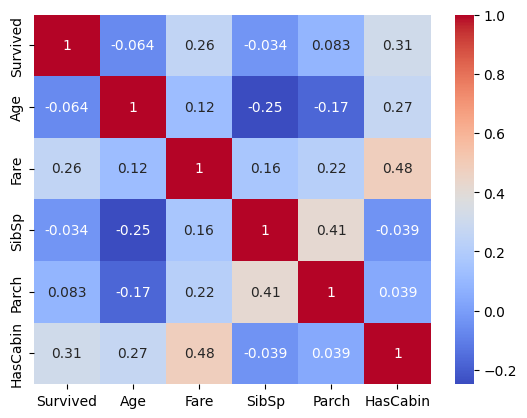

In [59]:
import matplotlib.pyplot as plt
sns.heatmap(df1[['Survived','Age','Fare','SibSp','Parch','HasCabin']].corr(), 
            annot=True, cmap='coolwarm')
plt.show()


This heatmap displays the Pearson correlation coefficients between numerical variables. Values closer to 1 or -1 indicate a stronger relationship, while 0 suggests no linear relationship.

Key Predictors of Survival
HasCabin (0.31): This is the strongest positive correlation with survival in this chart. It suggests that passengers with a recorded cabin were more likely to survive.

Fare (0.26): Higher fares also show a positive correlation with survival, likely because expensive tickets were associated with higher classes and better access to lifeboats.

Age (-0.064): The near-zero value indicates that Age by itself was not a strong linear predictor of survival for the entire population.

Other Notable Relationships
Fare and HasCabin (0.48): These variables are moderately correlated, confirming that those who paid more were much more likely to have a documented cabin.

SibSp and Parch (0.41): This positive relationship shows that people traveling with siblings or spouses were often traveling with parents or children as well (family units).

Age and SibSp (-0.25): A negative correlation suggests that younger passengers were more likely to have siblings or spouses on board compared to older passengers.

Wealth-related features (Fare and Cabin) had a more direct linear relationship with survival than family size or age alone.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15944\3956830847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1


<Axes: xlabel='FamilySize', ylabel='Survived'>

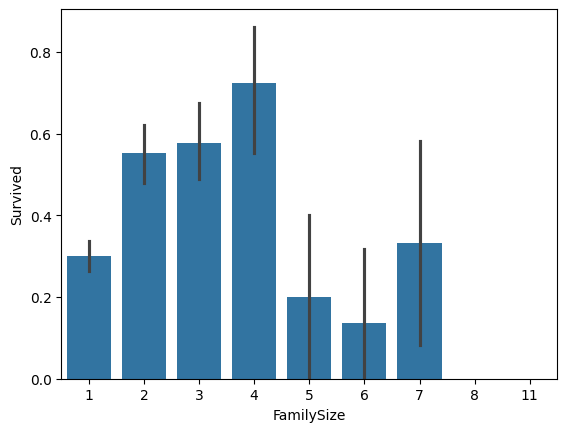

In [60]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df1)


This bar chart shows the survival probability based on the total number of people in a passenger's family (FamilySize):

Optimal Family Size: Passengers in small-to-medium families of 4 had the highest survival rate, followed by families of 2 and 3.

Solo Travelers: People traveling alone (FamilySize 1) had a relatively low survival probability, around 30%.

Large Families: Survival chances dropped sharply for families of 5 or 6, and fell to 0 for the largest families (sizes 8 and 11).

Traveling in a small family (2–4 people) was the most beneficial for survival, while being alone or in a very large group decreased the odds.



In [61]:
df1 = df1.copy()
df1['Title'] = df1['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df1['Title'] = df1['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Misc'
)
df1['Title'] = df1['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Mr


In [62]:
df1.drop(columns=['Name'], inplace=True)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,2,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,1,Mr


In [63]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df1['FamilyGroup'] = 'Alone'
df1.loc[df1['FamilySize'] > 1, 'FamilyGroup'] = 'Small'
df1.loc[df1['FamilySize'] > 4, 'FamilyGroup'] = 'Large'
df1['FareBin'] = pd.qcut(df1['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,Title,FamilyGroup,FareBin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2,Mr,Small,Low
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2,Mrs,Small,Very High
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Miss,Alone,Mid
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,2,Mrs,Small,Very High
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,1,Mr,Alone,Mid


In [64]:
# Select only the features we want for the model
features = ['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 
            'HasCabin', 'Title', 'FamilyGroup', 'FareBin']
df_final = df1[features]

# Fill any remaining missing Age values with the median
df_final['Age'] = df_final['Age'].fillna(df_final['Age'].median())

# Convert text to numbers (One-Hot Encoding)
df_final = pd.get_dummies(df_final, columns=['Sex', 'Embarked', 'Title', 'FamilyGroup', 'FareBin'])

df_final.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15944\1860507253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Age'] = df_final['Age'].fillna(df_final['Age'].median())


,Survived,Pclass,Age,HasCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Title_Miss,Title_Mr,Title_Mrs,FamilyGroup_Alone,FamilyGroup_Large,FamilyGroup_Small,FareBin_Low,FareBin_Mid,FareBin_High,FareBin_Very High
0,0,3,22.0,0,False,True,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False
1,1,1,38.0,1,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,1,3,26.0,0,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
3,1,1,35.0,1,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
4,0,3,35.0,0,False,True,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final.drop('Survived', axis=1)
y = df_final['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_final.head()

,Survived,Pclass,Age,HasCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Title_Miss,Title_Mr,Title_Mrs,FamilyGroup_Alone,FamilyGroup_Large,FamilyGroup_Small,FareBin_Low,FareBin_Mid,FareBin_High,FareBin_Very High
0,0,3,22.0,0,False,True,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False
1,1,1,38.0,1,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,1,3,26.0,0,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
3,1,1,35.0,1,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
4,0,3,35.0,0,False,True,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}


results = {}
for name, model in models.items():
    
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

for name, acc in results.items():
    print(f"{name}: {acc:.2%}")

Logistic Regression: 83.71%
Random Forest: 77.53%
KNN: 77.53%
SVM: 80.90%


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       109
           1       0.76      0.84      0.80        69

    accuracy                           0.84       178
   macro avg       0.83      0.84      0.83       178
weighted avg       0.84      0.84      0.84       178

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

              preci

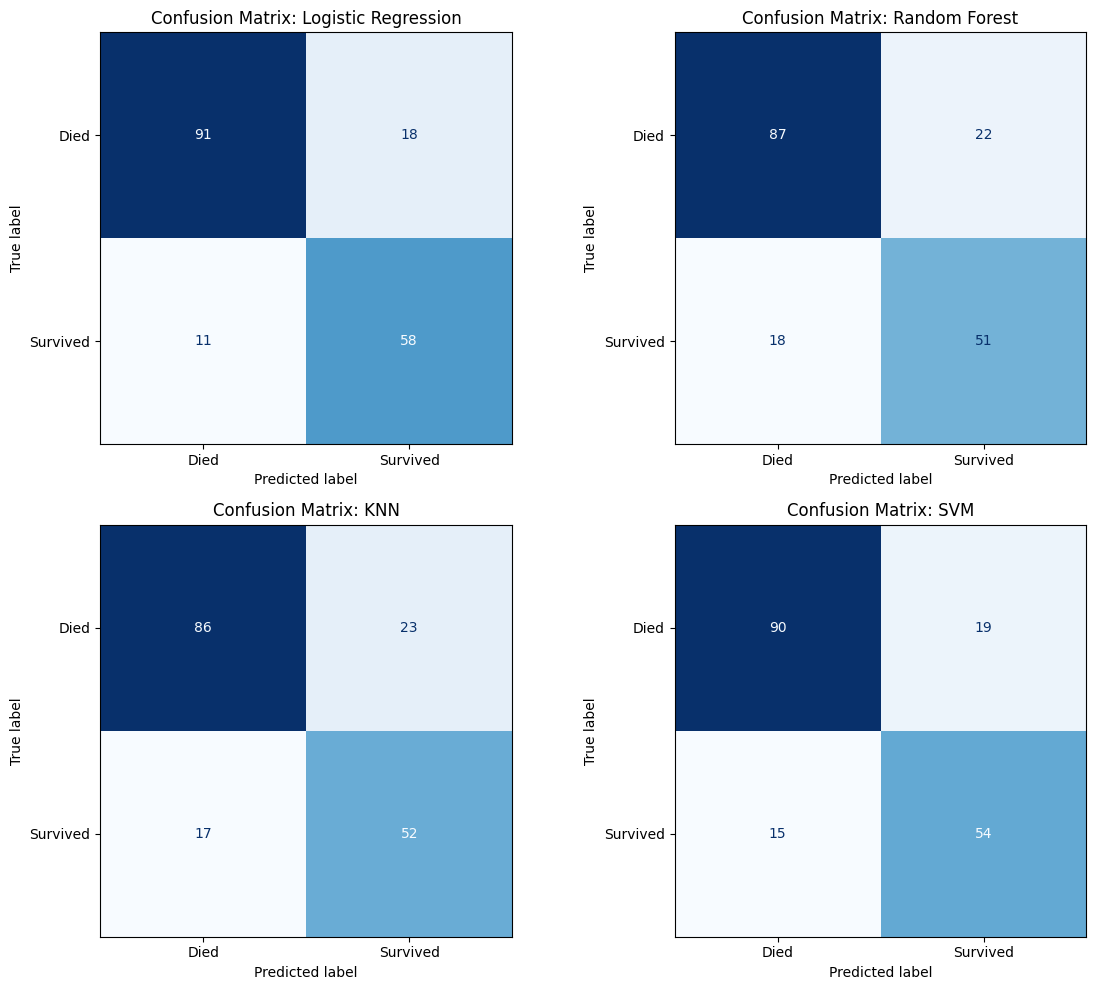

In [67]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    
    predictions = model.predict(X_test_scaled)
    
    
    print(classification_report(y_test, predictions))
    
    
    ConfusionMatrixDisplay.from_predictions(
        y_test, 
        predictions, 
        display_labels=['Died', 'Survived'], 
        cmap='Blues', 
        ax=axes[i],
        colorbar=False
    )
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()


The best model: Logistic Regression
Accuracy (84%): This model correctly predicted the outcome for 84% of the passengers in the test set, which is the highest among all four models.

Balance: It has the highest F1-score for both those who died (0.86) and those who survived (0.80), meaning it balances precision and recall better than the complex models.

The Confusion Matrix: It correctly identified 58 survivors (True Positives) and only missed 11 (False Negatives), which is the best "catch rate" for survivors.

Model,Accuracy,Precision (Survived),Recall (Survived),Key Characteristic
Logistic Regression,  84%,0.76,0.84,  Most Reliable: Best at finding survivors.
SVM,   81%,0.74,0.78,  Balanced: Strong second place.
Random Forest, 78%,0.70,0.74,   Lower Accuracy: May need hyperparameter tuning.
KNN,  78%,0.69,0.75,   Struggled: Similar performance to Random Forest.

Interpreting the Confusion Matrices

True Negatives : All models were very strong at predicting who would die. Logistic Regression correctly identified 91 people who didn't survive.

False Positives : This is where models were "too optimistic." Random Forest and KNN had the highest errors here (22 and 23), predicting survival for people who actually perished.

False Negatives (Bottom-Left): These are the "Missed Survivors." Logistic Regression was the most observant, missing only 11 survivors, whereas KNN and Random Forest missed 17 and 18 respectively.

Final conclusion 
The Conclusion: "Through comparative analysis, the Logistic Regression model proved most effective, reaching an accuracy of 84%. This suggests that survival on the Titanic was driven by strong, direct relationships specifically gender, class, and family size—rather than highly complex or hidden patterns that a Random Forest might typically find."

In [68]:
importance = models['Logistic Regression'].coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
3          Sex_female    0.565152
8        Title_Master    0.559698
13  FamilyGroup_Alone    0.352961
2            HasCabin    0.337970
12          Title_Mrs    0.259997
19  FareBin_Very High    0.152942
5          Embarked_C    0.082821
15  FamilyGroup_Small    0.073191
18       FareBin_High    0.049661
6          Embarked_Q    0.043255
17        FareBin_Mid   -0.024031
9          Title_Misc   -0.035792
10         Title_Miss   -0.081801
7          Embarked_S   -0.099808
16        FareBin_Low   -0.177112
11           Title_Mr   -0.355463
1                 Age   -0.517654
4            Sex_male   -0.565152
0              Pclass   -0.669092
14  FamilyGroup_Large   -0.774038


1. The Survival "Boosters" (Positive Importance)
Sex_female (0.565): This was the strongest positive predictor. If a passenger was female, the model significantly increased their survival probability.

Title_Master (0.559): This confirms earlier observation about the "survival bump" for children. Young boys (Masters) were prioritized for lifeboats.

HasCabin (0.337): Just as correlation heatmap suggested (0.31), having a recorded cabin was a strong indicator of survival.

2. The Survival "Obstacles" (Negative Importance)
FamilyGroup_Large (-0.774): This is the strongest overall predictor. As seen in the family size bar chart, being in a very large family was the biggest disadvantage to surviving.

Pclass (-0.669): Because 1st class is "1" and 3rd class is "3", a negative number here means as the class number goes up (getting poorer), the survival chance goes down.

Age (-0.517): This suggests that, generally, being older decreased survival chances once other factors were considered.

Final Project Conclusion:
"The project successfully predicted Titanic survival with 84% accuracy using Logistic Regression. Feature engineering revealed that Family Size and Social Class were the most critical factors. While being female or a young child (Title_Master) provided the best chance of survival, being part of a large family group was the most significant barrier to escaping the ship."

In [69]:
my_passenger = {
    'Pclass': 3,
    'Age': 25,
    'HasCabin': 0,
    'Sex_female': 0,
    'Sex_male': 1,
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,
    'Title_Master': 0,
    'Title_Misc': 0,
    'Title_Miss': 0,
    'Title_Mr': 1,
    'Title_Mrs': 0,
    'FamilyGroup_Alone': 1,
    'FamilyGroup_Large': 0,
    'FamilyGroup_Small': 0,
    'FareBin_Low': 1,
    'FareBin_Mid': 0,
    'FareBin_High': 0,
    'FareBin_Very High': 0
}
test_passenger = pd.DataFrame([my_passenger])
test_passenger = test_passenger[X.columns]
test_passenger_scaled = scaler.transform(test_passenger)
prediction = models['Logistic Regression'].predict(test_passenger_scaled)
probability = models['Logistic Regression'].predict_proba(test_passenger_scaled)
status = "SURVIVED" if prediction[0] == 1 else "DIED"
print(f"Prediction: {status}")
print(f"Probability of Survival: {probability[0][1]:.2%}")

Prediction: DIED
Probability of Survival: 6.97%


In [70]:
my_passenger = {
    'Pclass': 3,
    'Age': 25,
    'HasCabin': 0,
    'Sex_female': 1,      
    'Sex_male': 0,       
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,
    'Title_Master': 0,
    'Title_Misc': 0,
    'Title_Miss': 0,
    'Title_Mr': 0,        
    'Title_Mrs': 1,       
    'FamilyGroup_Alone': 1,
    'FamilyGroup_Large': 0,
    'FamilyGroup_Small': 0,
    'FareBin_Low': 1,
    'FareBin_Mid': 0,
    'FareBin_High': 0,
    'FareBin_Very High': 0
}
test_passenger = pd.DataFrame([my_passenger])
test_passenger = test_passenger[X.columns] 
test_passenger_scaled = scaler.transform(test_passenger)
prediction = models['Logistic Regression'].predict(test_passenger_scaled)
probability = models['Logistic Regression'].predict_proba(test_passenger_scaled)
status = "SURVIVED" if prediction[0] == 1 else "DIED"
print(f"Prediction: {status}")
print(f"Probability of Survival: {probability[0][1]:.2%}")

Prediction: SURVIVED
Probability of Survival: 78.39%
